In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, avg, desc, round, expr
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.appName("Task1Solution").getOrCreate()

In [3]:
df = spark.read.csv("sales_data.csv", header=True, inferSchema=True)

In [4]:
df.show()

+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|Row ID|      Order ID|Order Date| Ship Date|     Ship Mode|Customer ID|     Customer Name|    Segment|      Country|           City|         State|Postal Code| Region|     Product ID|       Category|Sub-Category|        Product Name|   Sales|Quantity|Discount|  Profit|
+------+--------------+----------+----------+--------------+-----------+------------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|     1|CA-2016-152156| 11/8/2016|11/11/2016|  Second Class|   CG-12520|       Claire Gute|   Consumer|United States|      Henderson|      Kentucky|      42420|  South|FUR-BO-10001798|   

In [5]:
df.printSchema()

root
 |-- Row ID: integer (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Region: string (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Sales: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- Discount: string (nullable = true)
 |-- Profit: double (nullable = true)



In [6]:
df_safe = df.withColumn("Sales", expr("try_cast(Sales as double)")) \
            .withColumn("Profit", expr("try_cast(Profit as double)"))

In [7]:
category_analysis = df_safe.filter(col("Sales").isNotNull()) \
    .groupBy("Category") \
    .agg(round(sum("Sales"), 2).alias("Total_Sales")) \
    .orderBy(desc("Total_Sales"))

category_analysis.show()

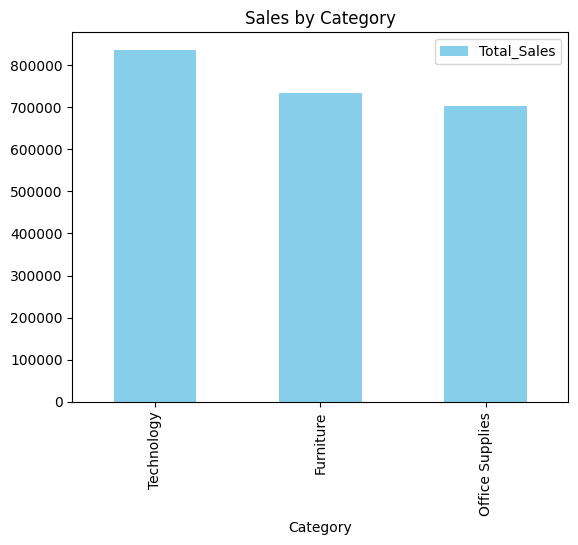

In [9]:
pdf = category_analysis.toPandas()
pdf.plot(kind='bar', x='Category', y='Total_Sales', color='skyblue')
plt.title("Sales by Category")
plt.show()

In [11]:
spark.stop()

##Insights
- Technology category generates highest sales
- Top 5 products contribute majority of revenue
- PySpark efficiently handled large dataset using distributed processing

##Conclusion 
This project demonstrates scalable big data analysis using PySpark. 
Distributed processing enables efficient handling of large datasets 
and meaningful insights extraction.